# **analysis of gathered data**

In [11]:
import os

# Get the current working directory
script_dir = os.getcwd()
print("Current Working Directory:", script_dir)

Current Working Directory: /home/tim_darma/Documents/CreaTech/Computer science/rhytme_game/rhythme_game_proj/src


### DATA READING

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the current working directory (where the notebook is located)
script_dir = os.getcwd()

# Navigate one level up and join with 'data' folder
folder_path = os.path.join(script_dir, "..", "data")  # ".." means one level up

all_data = []

# Check if the folder exists
if os.path.exists(folder_path):
    # List all CSV files in the folder and load them
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            print(f"Loading data from {file_path}...")
            
            # Load CSV and add a 'player_name' column based on the file name
            data = pd.read_csv(file_path)
            player_name = os.path.splitext(file_name)[0]  # Extract file name without extension
            data['player_name'] = player_name  # Add the player name as a column
            
            all_data.append(data)
else:
    print(f"Folder '{folder_path}' does not exist. Please check the path.")

# Combine all data into a single DataFrame if any data is loaded
if all_data:
    df = pd.concat(all_data, ignore_index=True)
    print("Combined DataFrame:")
    print(df.head())
else:
    print("No data loaded.")

# Convert timestamps to datetime for analysis
df['Creation_time_stamp'] = pd.to_datetime(df['Creation_time_stamp'])
df['finish_time_stamp'] = pd.to_datetime(df['finish_time_stamp'])

# Calculate game duration (in seconds)
df['game_duration'] = (df['finish_time_stamp'] - df['Creation_time_stamp']).dt.total_seconds()


### DATA PLOTTING

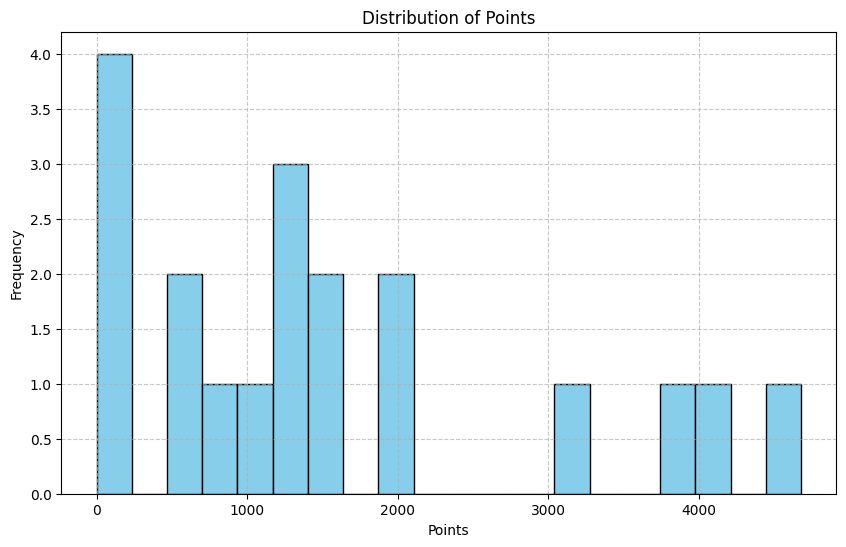

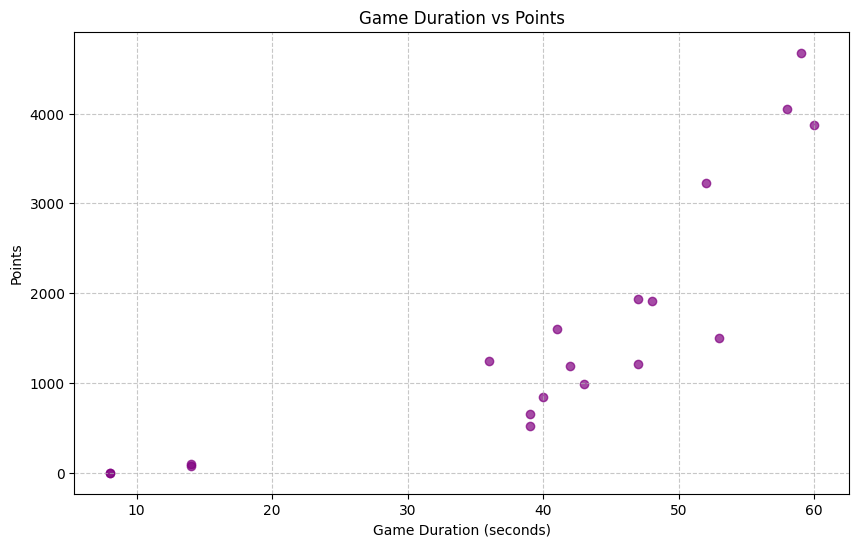

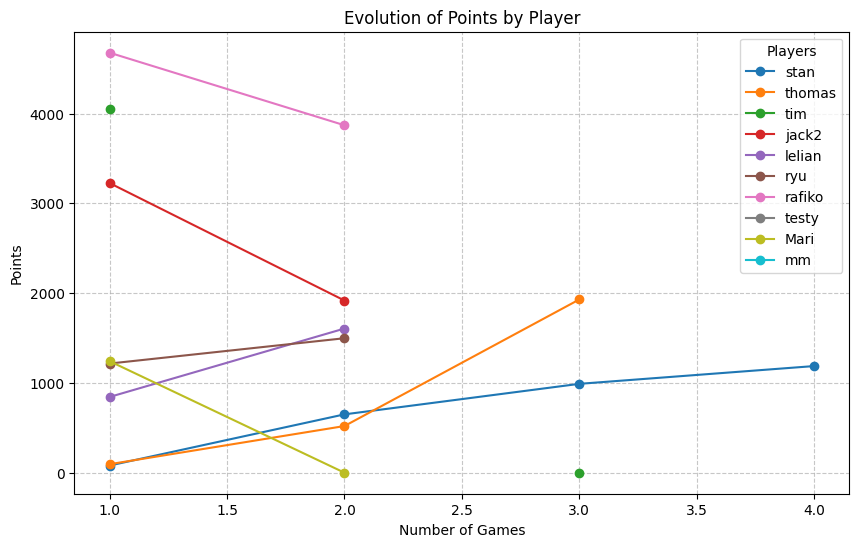

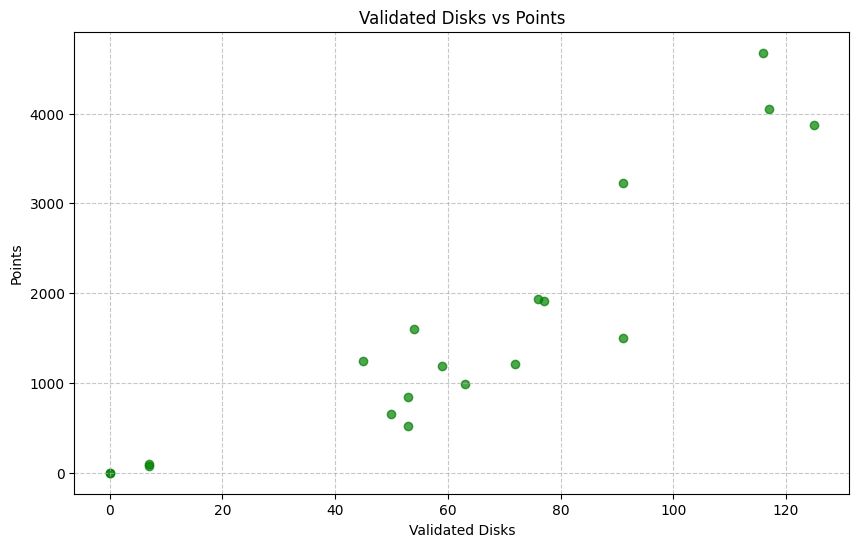

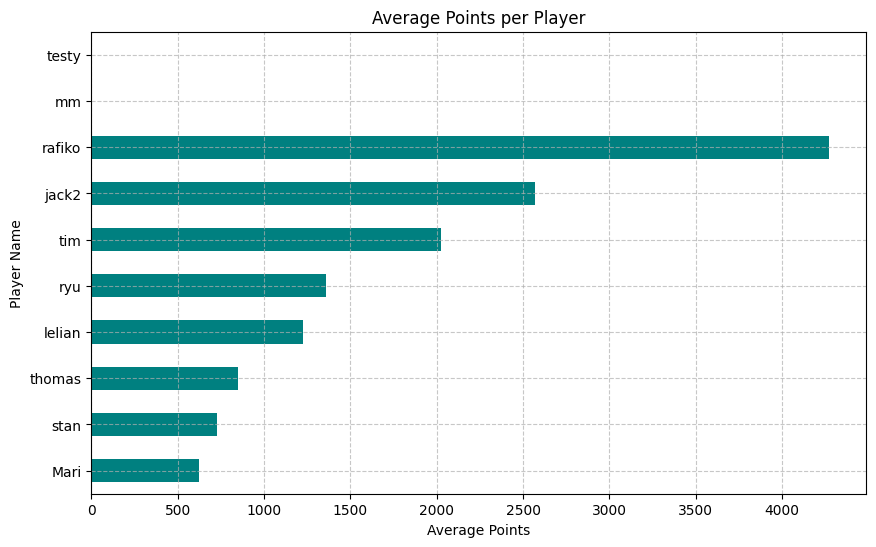

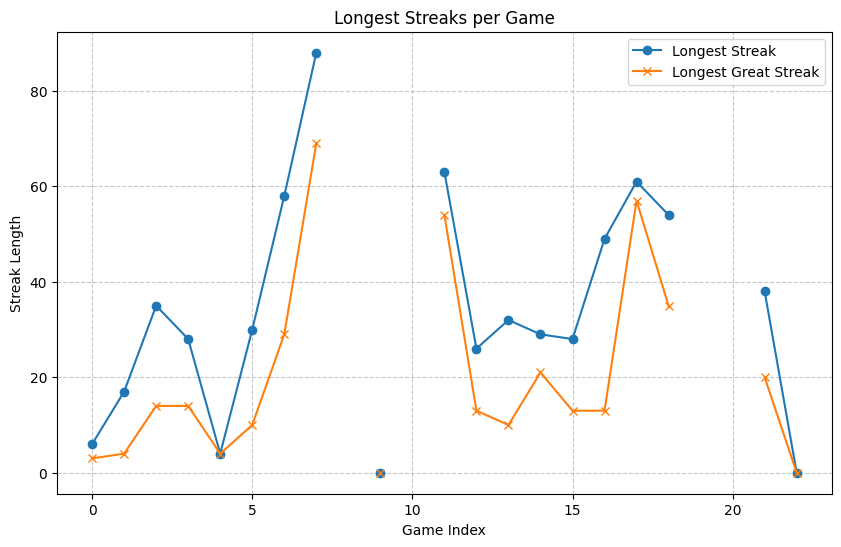

In [24]:
# Step 2: Visualizations
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is the combined DataFrame from multiple CSVs.

# 1. Distribution of Points
plt.figure(figsize=(10, 6))
plt.hist(df['point'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 2. Game Duration vs. Points
plt.figure(figsize=(10, 6))
plt.scatter(df['game_duration'], df['point'], color='purple', alpha=0.7)
plt.title('Game Duration vs Points')
plt.xlabel('Game Duration (seconds)')
plt.ylabel('Points')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 3. Evolution of Scores by Player
df['player_game_count'] = df.groupby('player_name').cumcount() + 1
plt.figure(figsize=(10, 6))
for player in df['player_name'].unique():
    player_data = df[df['player_name'] == player]
    plt.plot(player_data['player_game_count'], player_data['point'], marker='o', label=player)
plt.title('Evolution of Points by Player')
plt.xlabel('Number of Games')
plt.ylabel('Points')
plt.legend(title="Players")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 4. Validated Disks vs Points
plt.figure(figsize=(10, 6))
plt.scatter(df['validated_disk'], df['point'], color='green', alpha=0.7)
plt.title('Validated Disks vs Points')
plt.xlabel('Validated Disks')
plt.ylabel('Points')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5. Average Points per Game for Each Player
avg_points = df.groupby('player_name')['point'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_points.plot(kind='barh', color='teal')
plt.title('Average Points per Player')
plt.xlabel('Average Points')
plt.ylabel('Player Name')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 6. Longest Streaks Evolution per Game
plt.figure(figsize=(10, 6))
plt.plot(df['longest_streak'], label='Longest Streak', marker='o')
plt.plot(df['longest_grt_streak'], label='Longest Great Streak', marker='x')
plt.title('Longest Streaks per Game')
plt.xlabel('Game Index')
plt.ylabel('Streak Length')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()